## Introduction to Neural Networks

In this TP, we will learn how to implement a neural network with one hidden layer frop scratch, to implement binary classification on a dataset that is not linearly separable

Denoting $m$ the number of hidden units, the structure of a neural network with one hidden layer can be written as follows:
\begin{align*}
&z_h = W_h (x,1) \, ,  &&a_h = \sigma(z_h) \, , &&z_o = w_o^T (a_h,1) \, , &&a_o = \sigma(z_o) \, .
\end{align*}
where $W_h \in \mathbb{R}^{m\times(p+1)}, w_o \in \mathbb{R}^{p+1}$.

In [1]:
from sklearn import datasets  
import numpy as np  
import matplotlib.pyplot as plt

n = 300
np.random.seed(0)  
dataset, labels = datasets.make_moons(n,noise=.1)
labels = labels.reshape(n)
plt.figure(figsize=(10,7))  
plt.scatter(dataset[:,0], dataset[:,1], c=labels, cmap=plt.cm.winter)
plt.show()

In [2]:
np.shape(dataset)

(300, 2)

**1) Implement the sigmoid function and its derivative**

In [3]:
def sigmoid(x):  
    return 1/(1+np.exp(-x))

def sigmoid_der(x):  
    return sigmoid(x) *(1-sigmoid (x))

** 2) Implement the forward pass through the network of a datapoint $x_i$ **

In [4]:
def forward(x,wh,wo):
    zh = wh.dot(np.append(x,1))
    ah = sigmoid(zh)
    zo = wo.dot(np.append(ah,1))
    ao = sigmoid(zo)
    return zh, ah, zo, ao

** 3) Implement the backward pass through the network i.e. compute the gradient of the error $c_i = \frac{1}{2}(y_i-a_0)^2$ with respect to $W_h$ and $w_o$ with backpropagation**

The backpropagation algorithm uses the chain rule to compute the gradients. We have 
\begin{align*}
\frac{\mathrm{d}c(w_o,W_h)}{\mathrm{d} w_o} &= \frac{\mathrm{d}c}{\mathrm{d} a_o} \frac{\mathrm{d}a_o}{\mathrm{d} z_o} \frac{\mathrm{d}z_o}{\mathrm{d} w_o} \, , \\
\frac{\mathrm{d}c(w_o,W_h)}{\mathrm{d} W_h} &= \frac{\mathrm{d}c}{\mathrm{d} a_o} \frac{\mathrm{d}a_o}{\mathrm{d} z_o} \frac{\mathrm{d}z_o}{\mathrm{d} a_h} \frac{\mathrm{d}a_h}{\mathrm{d} z_h} \frac{\mathrm{d}z_h}{\mathrm{d} W_h} \, ,
\end{align*}
where this computation makes sense if we think in terms of diffenrentials, with the products being compositions. However, we must code these relations in terms of arrays rather than in terms of differentials. 

The first relation is easy as $\frac{\mathrm{d}c}{\mathrm{d} a_o}$ and $\frac{\mathrm{d}a_o}{\mathrm{d} z_o}$ are both multiplications by some scalar and $\frac{\mathrm{d}z_o}{\mathrm{d} w_o}$ is the scalar product with $a_h$. Thus the gradient can be easily computed.

For the second relation, $\frac{\mathrm{d}c}{\mathrm{d} a_o} \frac{\mathrm{d}a_o}{\mathrm{d} z_o}$ is some scalar, $\frac{\mathrm{d}z_o}{\mathrm{d} a_h}$ is the scalar product with $w_o$, $\frac{\mathrm{d}a_h}{\mathrm{d} z_h}$ is the multiplication by the diagonal matrix with diagonal $\sigma'(z_h)$.
Finally, by denoting $g$ the gradient vector corresponding to $\frac{\mathrm{d}c}{\mathrm{d} z_h}$, we have
\begin{equation*}
{\mathrm{d}c} = \frac{\mathrm{d}c}{\mathrm{d} z_h} \frac{\mathrm{d}z_h}{\mathrm{d} W_h} {\mathrm{d} W_h} = g^T dW_h x = \operatorname{tr}(g^T dW_h x) = \operatorname{tr}(dW_h (g x^T)^T) \, .
\end{equation*}
Thus the gradient of $c$ w.r.t. $W_h$ is $gx^T$.

In [12]:
def gradients(x,y,zh,ah,zo,ao):
    dcost_dao = ao - y
    dao_dzo = sigmoid_der(zo) 
    dzo_dwo = np.append(ah,1)
    dcost_dwo = dcost_dao * dao_dzo * dzo_dwo

    dcost_dzo = dcost_dao * dao_dzo
    dzo_dah = wo[:-1]
    dcost_dah = dcost_dzo * dzo_dah
    dah_dzh = sigmoid_der(zh) 
    dcost_dzh = dcost_dah * dah_dzh
    dcost_dwh = np.matrix(dcost_dzh).T * np.matrix(np.append(x,1))
    
    return dcost_dwo, dcost_dwh

** 4) Implement stochastic gradient descent on your dataset to minimize the classification error**

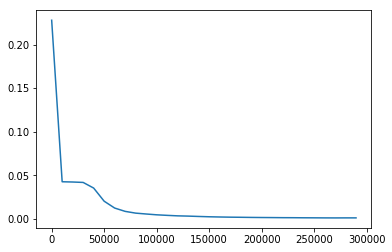

In [16]:
m = 10
lr = .1
wh = np.random.rand(m,len(dataset[0])+1)  
wo = np.random.rand(m+1)  

T = 3*10**5
times = []
errors = []

for t in range(T):  
   
    i = np.random.randint(n)
    x, y = dataset[i], labels[i]
    zh, ah, zo, ao = forward(x, wh, wo)

    dcost_dwo, dcost_dwh = gradients(x,y,zh,ah,zo,ao)

    wh -= lr * dcost_dwh
    wo -= lr * dcost_dwo
    
    if t%10**4 == 0:
        error_out = 0
        for i in range(n):
            x, y = dataset[i], labels[i]
            zh, ah, zo, ao = forward(x, wh, wo)
            error_out += (ao - y)**2/2
        error_out /= n
        times.append(t)
        errors.append(error_out)

plt.plot(times, errors)
plt.show()

** 5) Implement a prediction function that takes any point in $\mathbb{R}^2$ as an input and returns a label **

In [17]:
def predict(x,wh,wo):
    zh, ah, zo, ao = forward(x,wh,wo)
    if ao <1/2:
        plt.scatter(x[0],x[1],color = 'red')
    else:
        plt.scatter(x[0],x[1],color = 'orange')

** 6) Display the areas that correspond to each label along with the dataset **

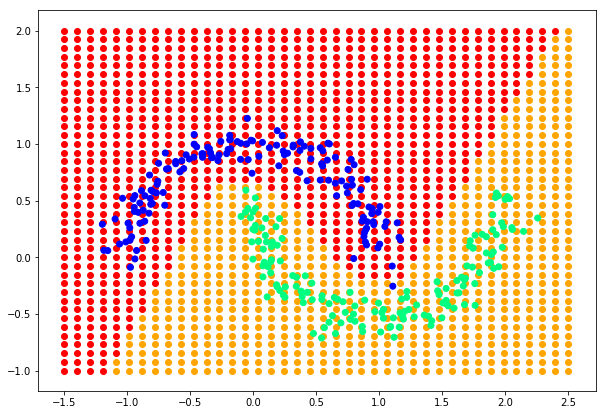

In [18]:
ngrid = 40
gridx = np.linspace(-1.5,2.5,ngrid)
gridy = np.linspace(-1,2,ngrid)
plt.figure(figsize=(10,7))  
for i in range(ngrid):
    for j in range(ngrid):
        x = np.array([gridx[i],gridy[j]])
        predict(x.T,wh,wo)
plt.scatter(dataset[:,0], dataset[:,1],c=labels[:] , cmap=plt.cm.winter)
plt.show()

** 7) Observe the effect of the number of layers and of the number of hidden units with this [interactive neural net trainer](https://playground.tensorflow.org/). **